# 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3., 3., size=100)
X = x.reshape(-1, 1)
y = 0.5 * (x ** 2) + x + 2 + np.random.normal(0., 1., size=100)

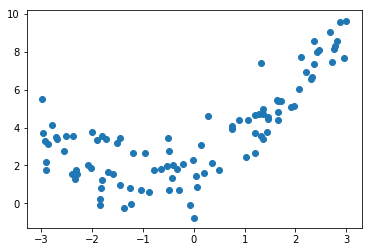

In [3]:
plt.scatter(x, y)

## 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

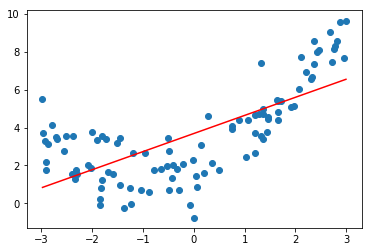

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

In [6]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 使用多项式回归

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

### degree=2

In [8]:
poly_reg2 = PolynomialRegression(degree=2)
poly_reg2.fit(X, y)

y2_predict = poly_reg2.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

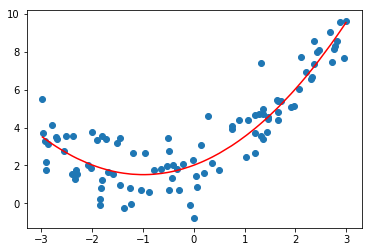

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')

### degree=10

In [10]:
poly_reg10 = PolynomialRegression(degree=10)
poly_reg10.fit(X, y)

y10_predict = poly_reg10.predict(X)
mean_squared_error(y, y10_predict)

1.050846676376417

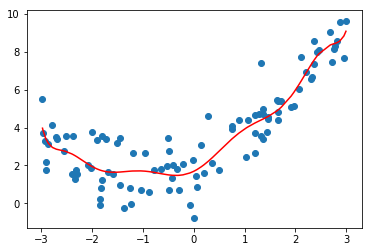

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')

### degree=100

In [12]:
poly_reg100 = PolynomialRegression(degree=100)
poly_reg100.fit(X, y)

y100_predict = poly_reg100.predict(X)
mean_squared_error(y, y100_predict)

0.6808404255266471

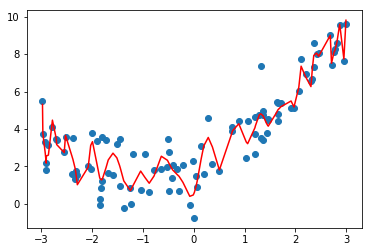

In [13]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')

In [15]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = poly_reg100.predict(X_plot)

[-3, 3, -1, 10]

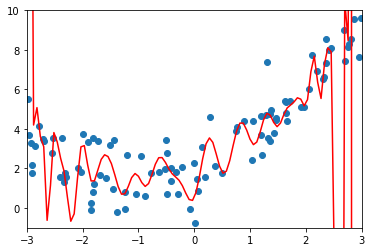

In [16]:
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])